In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [182]:
#Load cleaned dataset
df_cleaned = pd.read_csv('df_raw_cleaned.csv')

In [183]:
df_cleaned.columns

Index(['LIMIT_BAL', 'AGE', 'default.payment.next.month', 'PAY_AGG',
       'BILL_AMT_BIN1', 'PAY_AMT_BIN1', 'SEX_1', 'SEX_2', 'EDUCATION_1',
       'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4', 'MARRIAGE_1', 'MARRIAGE_2',
       'MARRIAGE_3'],
      dtype='object')

In [184]:
#df_cleaned.corr()['default.payment.next.month'].sort_values().drop('default.payment.next.month').plot(kind='bar')

In [185]:
X = df_cleaned.drop('default.payment.next.month', axis=1)
y= df_cleaned['default.payment.next.month']

In [186]:
#Train Test Split
from sklearn.model_selection import train_test_split

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [188]:
y_train.value_counts()

default.payment.next.month
0    16137
1     4583
Name: count, dtype: int64

In [189]:
#Oversampling for minority data 
#from imblearn.combine import SMOTEENN

# Define the model
#smote_enn = SMOTEENN(random_state=42)

# Apply SMOTE + ENN to the dataset
#X_train, y_train = smote_enn.fit_resample(X_train, y_train)

In [190]:
#y_train.value_counts()

In [191]:
from imblearn.over_sampling import SMOTE

In [192]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [209]:
y_train.value_counts()

default.payment.next.month
0    16137
1    16137
Name: count, dtype: int64

In [194]:
#Normalizing data
from sklearn.preprocessing import MinMaxScaler

In [195]:
scaler = MinMaxScaler()

In [196]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [197]:
#Creating ANN model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [198]:
model = Sequential()

# input layer
model.add(Dense(14,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(7, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(3, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [199]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=50)

In [200]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=500,
          batch_size=256,
          validation_data=(X_test, y_test), 
          callbacks=[early_stop]
          )

Epoch 1/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.6902 - val_loss: 0.6342
Epoch 2/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6532 - val_loss: 0.5368
Epoch 3/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.5819 - val_loss: 0.5231
Epoch 4/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.5346 - val_loss: 0.5129
Epoch 5/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5110 - val_loss: 0.5137
Epoch 6/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4923 - val_loss: 0.5071
Epoch 7/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4812 - val_loss: 0.4975
Epoch 8/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4690 - val_loss: 0.4888
Epoch 9/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4673 - val_loss: 0.4922
Epoch 10/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4664 - val_loss: 0.4987
Epoch 11/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4621 - val_loss: 0.4911
Epoch 12/500
127/127 ━━━━━━━━━━━━━━━━━━━━

In [201]:
#Evaluate model performance
losses = pd.DataFrame(model.history.history)

<Axes: >

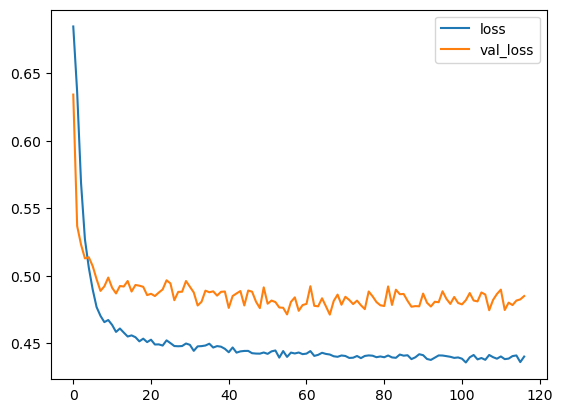

In [202]:
losses[['loss','val_loss']].plot()

In [203]:
from sklearn.metrics import classification_report,confusion_matrix

In [204]:
y_pred = model.predict(X_test)

278/278 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [205]:
y_pred = np.where(y_pred > 0.5, 1,0)

In [206]:
report_model = classification_report(y_test, y_pred, target_names=['No Default','Default'])
print(report_model)

              precision    recall  f1-score   support

  No Default       0.84      0.89      0.87      6859
     Default       0.54      0.44      0.49      2022

    accuracy                           0.79      8881
   macro avg       0.69      0.67      0.68      8881
weighted avg       0.77      0.79      0.78      8881



In [207]:
dfConfu = confusion_matrix(y_test,y_pred)

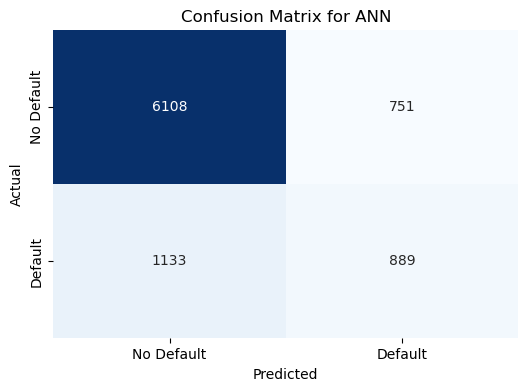

In [208]:
plt.figure(figsize=(6, 4))
sns.heatmap(dfConfu, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for ANN')
plt.show()

In [278]:
#Predicting default next month
customer_42 = df_cleaned.drop('default.payment.next.month',axis=1).iloc[42:43]
customer_42_resampled = scaler.transform(customer_42)

In [279]:
customer_42

,LIMIT_BAL,AGE,PAY_AGG,BILL_AMT_BIN1,PAY_AMT_BIN1,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
42,10000.0,22,0,2,2,1,0,0,1,0,0,0,1,0


In [280]:
k =np.where(model.predict(customer_42_resampled) > 0.5, 1,0)
print(k)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
[[0]]


In [282]:
#Actual
df_cleaned.iloc[42:43]['default.payment.next.month']

42    0
Name: default.payment.next.month, dtype: int64

In [283]:
#Save model
from tensorflow.keras.models import load_model

In [285]:
model.save('full_data_project_model.keras')  